In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from bdpy.dataform import Features, load_array
from bdpy.dataform import Features, DecodedFeatures
from glob import glob

In [2]:
subjects = ['AM', 'ES', 'TH']

layers = ['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8']

dec_feat_caffe_dir = '/home/share/data/contents_shared/ImageNetTest/derivatives/decoded_features/deeprecon_fmriprep_rep5_500voxel_allunits_fastl2lir_alpha100/decoded_features/caffe/bvlc_reference_caffenet'
feat_mean_std_caffe_dir = '/home/share/data/contents_shared/ImageNetTraining/derivatives/feature_decoders/deeprecon_fmriprep_rep5_500voxel_allunits_fastl2lir_alpha100/caffe/bvlc_reference_caffenet'

roi = 'VC'

In [3]:
def load_decfeat(root_dir, layer, sub, roi):
    decfeat_dir_root = root_dir

    decfeat_dir = os.path.join(decfeat_dir_root, layer, sub, roi)
    decfeat_files = glob(os.path.join(decfeat_dir, '*.mat'))

    decfeat_lst = []
    decfeat_labels = []
    for f in decfeat_files:
        decfeat_labels.append(os.path.splitext(os.path.basename(f))[0])
        decfeat_lst.append(load_array(f, 'feat'))

    decfeat = np.vstack(decfeat_lst)

    return decfeat

In [4]:
pat_corr_sub = []

for sub in subjects:

    dec_feat_list = []
    for lay in layers:
        decfeat = load_decfeat(dec_feat_caffe_dir, lay, sub, roi)
        dec_feat_list.append(decfeat)

    true_feat_list = []
    for lay in layers:
        truefeat_ = Features(os.path.join('/home/share/data/contents_shared/ImageNetTest/derivatives/features/caffe/bvlc_reference_caffenet'))
        truefeat = truefeat_.get_features(lay)

        true_feat_list.append(truefeat)

    feat_mean_list = []
    feat_std_list = []
    for lay in layers:
        dir = os.path.join(feat_mean_std_caffe_dir, lay, sub, roi, 'model')
        feat_mean = load_array(os.path.join(dir, 'y_mean.mat'), key='y_mean').squeeze()
        feat_std = load_array(os.path.join(dir, 'y_norm.mat'), key='y_norm').squeeze()

        feat_mean_list.append(feat_mean)
        feat_std_list.append(feat_std)

    pat_corr_list = []
    for i in range(8):
        pat_corr = [
            np.corrcoef(
                ((dec_feat_list[i][j, :] - feat_mean_list[i]) / feat_std_list[i]).flatten(),
                ((true_feat_list[i][j, :] - feat_mean_list[i]) / feat_std_list[i]).flatten() 
            )[0, 1]
            for j in range(50)
        ]

        pat_corr = np.array(pat_corr)

        pat_corr_list.append(pat_corr)
    

    pat_corr_sub.append(np.array(pat_corr_list))

    


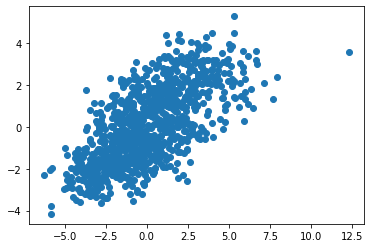

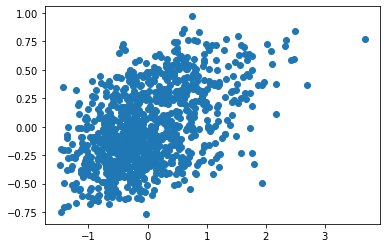

In [5]:
decfeat_fc8 = dec_feat_list[7]
truefeat_fc8 = true_feat_list[7]

ind = 5
plt.scatter(truefeat_fc8[ind, :], decfeat_fc8[ind, :])
plt.show()
plt.scatter((truefeat_fc8[ind, :] - feat_mean_list[7]) / feat_std_list[7], (decfeat_fc8[ind, :] - feat_mean_list[7]) / feat_std_list[7])

In [26]:
dec_feat_unet_dir = '/home/shunosuga/data/decoded_features/deeprecon_unet/decoded_features/u_net'
feat_mean_std_unet_dir = '/home/shunosuga/data/feature_decoders/deeprecon_unet/u_net'

roi = 'ROI_VC'

In [27]:
pat_corr_unet_sub = []

for sub in subjects:

    dec_feat_list_ = []
    for lay in layers:
        decfeat = load_decfeat(dec_feat_unet_dir, lay, sub, roi)
        dec_feat_list_.append(decfeat)

    true_feat_list_ = []
    for lay in layers:
        truefeat = np.load(os.path.join('/home/shunosuga/data/features/u_net', lay, 'test.npy'))
        true_feat_list_.append(truefeat)
    
    feat_mean_list_ = []
    feat_std_list_ = []
    for lay in layers:
        dir = os.path.join(feat_mean_std_unet_dir, lay, sub, roi, 'model')
        feat_mean = load_array(os.path.join(dir, 'y_mean.mat'), key='y_mean')
        feat_std = load_array(os.path.join(dir, 'y_norm.mat'), key='y_norm')

        feat_mean_list_.append(feat_mean)
        feat_std_list_.append(feat_std)

    pat_corr_list = []
    for i in range(8):
        pat_corr = [
            np.corrcoef(
                ((dec_feat_list_[i][j, :] - feat_mean_list_[i]) / feat_std_list_[i]).flatten(),
                ((true_feat_list_[i][j, :] - feat_mean_list_[i]) / feat_std_list_[i]).flatten() 
            )[0, 1]
            for j in range(50)
        ]

        pat_corr = np.array(pat_corr)

        pat_corr_list.append(pat_corr)
    

    pat_corr_unet_sub.append(np.array(pat_corr_list))

In [29]:
np.save('/home/shunosuga/data/sotsuron/pat_corr_res/with_norm/withnorm_caffe', pat_corr_sub)
np.save('/home/shunosuga/data/sotsuron/pat_corr_res/with_norm/withnorm_unet', pat_corr_unet_sub)

In [8]:
decfeat_fc8_ = dec_feat_list_[7]
truefeat_fc8_ = true_feat_list_[7]



In [26]:
huh = np.vstack([feat_mean_list_[7], feat_std_list_[7]])
huh.shape

(2, 1000)

In [31]:
x_ = [np.random.normal(loc, scale, 1) for loc, scale in huh.T]
x_ = np.array(x_).squeeze()
x_.shape

(1000,)

In [19]:
roi = 'ROI_VC'


pat_corr_unet_sub_wonorm = []

for sub in subjects:

    dec_feat_list_ = []
    for lay in layers:
        decfeat = load_decfeat(dec_feat_unet_dir, lay, sub, roi)
        dec_feat_list_.append(decfeat)

    true_feat_list_ = []
    for lay in layers:
        truefeat = np.load(os.path.join('/home/shunosuga/data/features/u_net', lay, 'test.npy'))
        true_feat_list_.append(truefeat)
    
    feat_mean_list = []
    feat_std_list = []
    for lay in layers:
        dir = os.path.join(feat_mean_std_unet_dir, lay, sub, roi, 'model')
        feat_mean = load_array(os.path.join(dir, 'y_mean.mat'), key='y_mean').squeeze()
        feat_std = load_array(os.path.join(dir, 'y_norm.mat'), key='y_norm').squeeze()

        feat_mean_list.append(feat_mean)
        feat_std_list.append(feat_std)

    pat_corr_list = []
    for i in range(8):
        pat_corr = [
            np.corrcoef(
                (dec_feat_list_[i][j, :]).flatten(),
                (true_feat_list_[i][j, :]).flatten() 
            )[0, 1]
            for j in range(50)
        ]

        pat_corr = np.array(pat_corr)

        pat_corr_list.append(pat_corr)
    

    pat_corr_unet_sub_wonorm.append(np.array(pat_corr_list))

In [20]:
dec_feat_caffe_dir = '/home/share/data/contents_shared/ImageNetTest/derivatives/decoded_features/deeprecon_fmriprep_rep5_500voxel_allunits_fastl2lir_alpha100/decoded_features/caffe/bvlc_reference_caffenet'
feat_mean_std_caffe_dir = '/home/share/data/contents_shared/ImageNetTraining/derivatives/feature_decoders/deeprecon_fmriprep_rep5_500voxel_allunits_fastl2lir_alpha100/caffe/bvlc_reference_caffenet'

roi = 'VC'

pat_corr_sub_wonorm = []

for sub in subjects:

    dec_feat_list = []
    for lay in layers:
        decfeat = load_decfeat(dec_feat_caffe_dir, lay, sub, roi)
        dec_feat_list.append(decfeat)

    true_feat_list = []
    for lay in layers:
        truefeat_ = Features(os.path.join('/home/share/data/contents_shared/ImageNetTest/derivatives/features/caffe/bvlc_reference_caffenet'))
        truefeat = truefeat_.get_features(lay)

        true_feat_list.append(truefeat)

    feat_mean_list = []
    feat_std_list = []
    for lay in layers:
        dir = os.path.join(feat_mean_std_caffe_dir, lay, sub, roi, 'model')
        feat_mean = load_array(os.path.join(dir, 'y_mean.mat'), key='y_mean').squeeze()
        feat_std = load_array(os.path.join(dir, 'y_norm.mat'), key='y_norm').squeeze()

        feat_mean_list.append(feat_mean)
        feat_std_list.append(feat_std)

    pat_corr_list = []
    for i in range(8):
        pat_corr = [
            np.corrcoef(
                (dec_feat_list[i][j, :]).flatten(),
                (true_feat_list[i][j, :]).flatten() 
            )[0, 1]
            for j in range(50)
        ]

        pat_corr = np.array(pat_corr)

        pat_corr_list.append(pat_corr)
    

    pat_corr_sub_wonorm.append(np.array(pat_corr_list))

In [21]:
for i in range(3):
    pat_ = pat_corr_unet_sub_wonorm[i]
    pat_li = []

    for j in range(8):
        pat = pat_[j]
        pat_mean = np.mean(pat)
        pat_li.append(pat_mean)

    print(pat_li)

[0.7789469405485471, 0.5971868884738685, 0.880554521179494, 0.8604461544895524, 0.8037481084650878, 0.8928411473728187, 0.7236513439928057, 0.734620974404036]
[0.7810084073714104, 0.594444808433279, 0.8814963061384734, 0.8627731386682038, 0.8090585733107568, 0.9004056921709344, 0.7417310578343187, 0.7204978911150838]
[0.7829868650522923, 0.6048361783559786, 0.8830248618176918, 0.8603166221526629, 0.8019855857788077, 0.8888206966870997, 0.7114135180745964, 0.726677176284135]


In [22]:
for i in range(3):
    pat_ = pat_corr_sub_wonorm[i]
    pat_li = []

    for j in range(8):
        pat = pat_[j]
        pat_mean = np.mean(pat)
        pat_li.append(pat_mean)

    print(pat_li)

[0.13869924623524565, 0.51577455849153, 0.5341724228827102, 0.5324252135075512, 0.4663084663539208, 0.433433874953722, 0.39264558479534356, 0.5935605719709709]
[0.13983304302413394, 0.5145336370852042, 0.5324655934063695, 0.5320026832598093, 0.46688884183803536, 0.445004408077529, 0.4134263381877667, 0.6053486348173667]
[0.1425350061215676, 0.5243662466898423, 0.5483018975003136, 0.5469710659138562, 0.4791463429562775, 0.44016443840489006, 0.398573456922802, 0.5874545817951214]


In [30]:
np.save('/home/shunosuga/data/sotsuron/pat_corr_res/without_norm/withoutnorm_caffe', pat_corr_sub_wonorm)
np.save('/home/shunosuga/data/sotsuron/pat_corr_res/without_norm/withoutnorm_unet', pat_corr_unet_sub_wonorm)